In [151]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [152]:
kpi = pd.read_excel('siste_rente_kpi.xlsx')

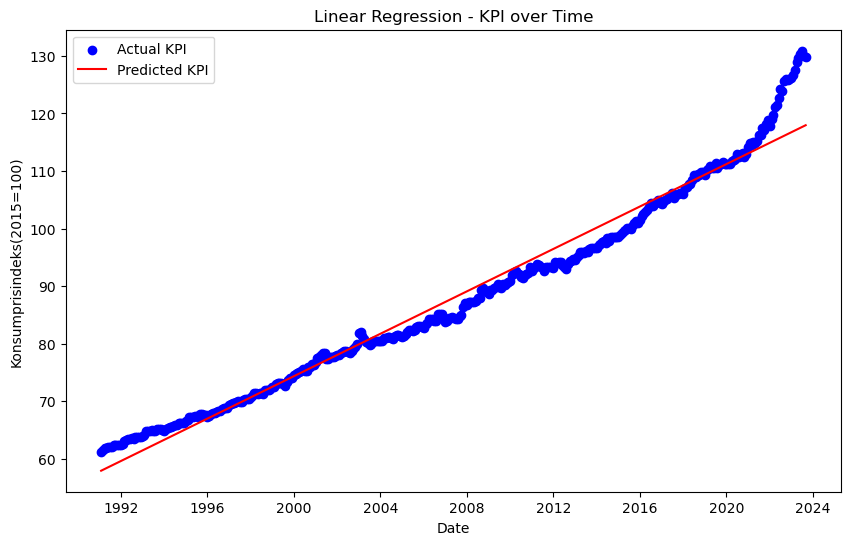

In [153]:
# Convert 'Dato' to datetime object
kpi['Dato'] = pd.to_datetime(kpi['Dato'])

kpi['Dato_numeric'] = (kpi['Dato'] - kpi['Dato'].min()).dt.days

X_kpi = kpi[['Dato_numeric']]
y_kpi = kpi['Konsumprisindeks(2015=100)']

model_kpi_r = LinearRegression()
model_kpi_r.fit(X_kpi, y_kpi)

predictions_kpi = model_kpi_r.predict(X_kpi)

# Extract the first Y value and corresponding date
start_date = kpi['Dato'].min()
start_y_value = y_kpi.iloc[0]

# Calculate the slope for a 2.5% yearly increase
slope =  0.025  # 2.5% as a decimal

# Calculate the intercept based on the start point
intercept = start_y_value - slope * (kpi['Dato'] - start_date).dt.days.iloc[0]

plt.figure(figsize=(10, 6))

# Plotting the data
plt.scatter(kpi['Dato'], y_kpi, color='blue', label='Actual KPI')

# Plotting the regression line
plt.plot(kpi['Dato'], predictions_kpi, color='red', label='Predicted KPI')

# Labels and title
plt.xlabel('Date')
plt.ylabel('Konsumprisindeks(2015=100)')
plt.title('Linear Regression - KPI over Time')
plt.legend()
plt.show()

In [154]:
def model(y, t, k, T, damping):
    I, inflation = y
    dI_dt = k * (inflation - T)
    dinflation_dt = -k * (I - T) - damping * (inflation - T)
    return [np.clip(dI_dt, -0.05, 0.10), np.clip(dinflation_dt, -0.05, 0.10)]

In [155]:
initial_rente = 0.0425
initial_inflasjon = 0.04
mal_inflasjon = 0.02
k = 0.05
damping = 0.1

# Tidsenheter
t = np.linspace(0, 12*25, 300)

In [156]:
resultat = odeint(model, [initial_rente, initial_inflasjon], t, args=(k, mal_inflasjon, damping))

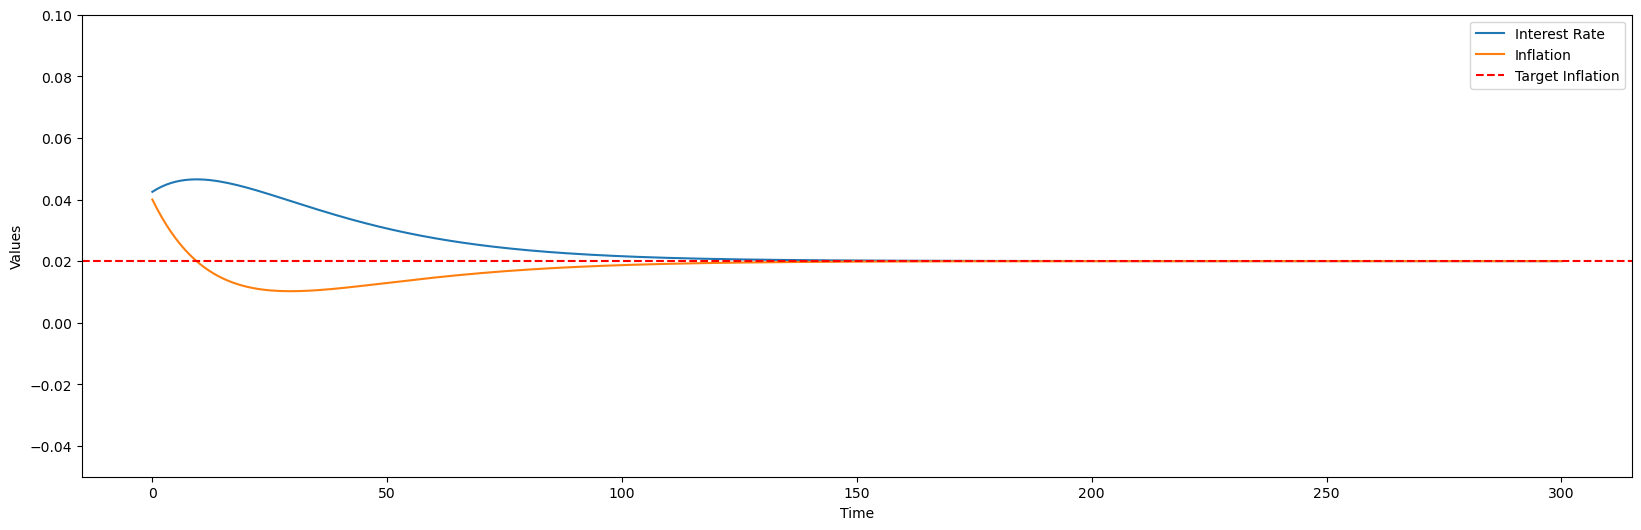

In [157]:
# Increase the size of the plot
plt.figure(figsize=(20, 6))

# Plot the results
plt.plot(t, resultat[:, 0], label='Interest Rate')
plt.plot(t, resultat[:, 1], label='Inflation')
plt.axhline(y=mal_inflasjon, color='r', linestyle='--', label='Target Inflation')
plt.xlabel('Time')
plt.ylabel('Values')
plt.ylim([-0.05, 0.10])  # Set y-axis limits
plt.legend()
plt.show()

In [158]:
rente = [inner_list[0] for inner_list in resultat]

In [193]:
def serielan_kalkulator(lanbelop, renteliste, antall_ar):
    terminer = antall_ar * 12
    monthly_payments = []
    avdrag = lanbelop/terminer
    total_betalt = 0

    for i, monthly_interest_rate in enumerate(renteliste):
        
        lanbelop = lanbelop - avdrag

        rentebeløp = (lanbelop * monthly_interest_rate)/12

        terminbetaling = avdrag + rentebeløp

        total_betalt += terminbetaling

        monthly_payments.append({
            "Rente": monthly_interest_rate,
            "Gjennværende lån": lanbelop,
            "Terminbeløp": terminbetaling,
            "Betalt lån måend": avdrag,
            "Betalt rente måend": rentebeløp,
            "total betalt": total_betalt
        })

        if i + 1 == terminer:
            break

    # Create the DataFrame
    result_df = pd.DataFrame(monthly_payments)

    # Set formatting for float values in the DataFrame
    pd.options.display.float_format = '{:.4f}'.format

    return result_df


Test serial

In [194]:
lan = 2000000
aar = 20

In [195]:
serie = serielan_kalkulator(lan , rente , aar)
serie.tail(50)

,Rente,Gjennværende lån,Terminbeløp,Betalt lån måend,Betalt rente måend,total betalt
190,0.0200,408333.3333,9014.9439,8333.3333,681.6106,2160891.2259
191,0.0200,400000.0000,9000.9879,8333.3333,667.6545,2169892.2137
192,0.0200,391666.6667,8987.0357,8333.3333,653.7024,2178879.2494
193,0.0200,383333.3333,8973.0871,8333.3333,639.7538,2187852.3366
194,0.0200,375000.0000,8959.1420,8333.3333,625.8087,2196811.4786
195,0.0200,366666.6667,8945.2002,8333.3333,611.8668,2205756.6787
196,0.0200,358333.3333,8931.2614,8333.3333,597.9280,2214687.9401
197,0.0200,350000.0000,8917.3255,8333.3333,583.9922,2223605.2656
198,0.0200,341666.6667,8903.3924,8333.3333,570.0591,2232508.6581
199,0.0200,333333.3333,8889.4619,8333.3333,556.1286,2241398.1200


In [164]:
import pandas as pd

def annuitetslan_kalkulator(lanbelop, renteliste, antall_ar):
    terminer = antall_ar * 12
    monthly_payments = []
    
    lanbelop = lanbelop
    total_betalt = 0

    for i , monthly_interest_rate in enumerate(renteliste):
        avdrag = lanbelop * (monthly_interest_rate * (1 + monthly_interest_rate)**(terminer - i)) / ((1 + monthly_interest_rate)**(terminer - i) - 1)

        rentebeløp = lanbelop * monthly_interest_rate

        terminbetaling = avdrag + rentebeløp
        
        avdrag = terminbetaling - rentebeløp

        lanbelop -= avdrag

        total_betalt += terminbetaling

        monthly_payments.append({
            "Rente": monthly_interest_rate,
            "Gjennværende lån": lanbelop,
            "Terminbeløp": terminbetaling,
            "Betalt lån måend": avdrag,
            "Betalt rente måend": rentebeløp,
            "total betalt": total_betalt
        })

    # Create the DataFrame
    result_df = pd.DataFrame(monthly_payments)

    # Set formatting for float values in the DataFrame
    pd.options.display.float_format = '{:.4f}'.format

    return result_df

Test annuitets

In [165]:
annu = annuitetslan_kalkulator(lan , rente , aar)

In [168]:
annu.head(50)

,Rente,Gjennværende lån,Terminbeløp,Betalt lån måend,Betalt rente måend,total betalt
0,0.0425,1914999.6789,170000.3211,85000.3211,85000.0000,170000.3211
1,0.0434,1831837.0199,166325.0670,83162.6590,83162.4080,336325.3881
2,0.0442,1750852.8589,161968.1180,80984.1610,80983.9570,498293.5061
3,0.0449,1672311.5210,157082.5040,78541.3379,78541.1661,655376.0101
4,0.0454,1596410.2863,151802.3201,75901.2347,75901.0854,807178.3302
5,0.0458,1523288.4038,146243.6311,73121.8824,73121.7487,953421.9613
6,0.0461,1453035.4318,140505.8210,70252.9720,70252.8490,1093927.7823
7,0.0463,1385698.8716,134673.0046,67336.5602,67336.4444,1228600.7869
8,0.0465,1321291.0504,128815.5309,64407.8212,64407.7097,1357416.3178
9,0.0465,1259795.2886,122991.4141,61495.7618,61495.6522,1480407.7319
